## 4.Transformada discreta de Fourier

A transformada discreta de Fourier transforma uma sequência de sinais uniformemente espaçados em informações sobre a frequência de todas as ondas senoidais necessárias para formar o sinal no domínio do tempo. 

O intervalo de $0$ a $t$ é dividido em $N$ subintervalos com largura $\Delta t = \frac{T}{N}$ em que $f_n$ designa o valor da função $f(t)$ no instante $t_n$.


A transformada de Fourier discreta pode ser escrita como



$$
F_k=\sum_{n=0}^{N-1} f_n e^{-i k \omega_0 n} \quad \text { para } k=0 \text { a } N-1
$$

e a transformada inversa de Fourier como

$$
f_n=\frac{1}{N} \sum_{k=0}^{N-1} F_k e^{i k \omega_n n} \quad \text { para } n=0 \text { a } N-1
$$

onde $\omega_0=2 \pi / N$.

 

* $N$ = número total de amostras 
* $n$ = índice da amostra
* $k$ = frequência, onde $ k\in [0,N-1]$
* $f_n$ = o valor do sinal em $t_n$
* $F_k$ = amplitude e fase da transformada

Usando a *Fórmula de Euler*

$$ e^{ \pm i a}=\cos a \pm i \operatorname{sen} a $$

podemos escrever a tansformada discreta de Fourier na forma trigonométrica como

$$
F_k=\frac{1}{N} \sum_{n=0}^N\left[f_n \cos \left(k \omega_0 n\right)-i f_n \operatorname{sen}\left(k \omega_0 n\right)\right.
$$

e 

$$
f_n=\sum_{k=0}^{N-1}\left[F_k \cos \left(k \omega_0 n\right)-i F_k \operatorname{sen}\left(k \omega_0 n\right)\right.
$$

Aqui,o fator de escala $1/N$ foi inserido na equação da transformada e não na da inversa.

Observe que $F_k$ é um número complexo que codifica as informações de amplitude e fase de um componente senoidal complexo $e^{i2\pi kn/N}$
do valor de $f_n$

A amplitude e a fase do sinal podem ser calculadas como:

$$Amp = \frac{|F_k|}{N}= \frac{\sqrt{Re(F_k)^2 + Im(F_k)^2}}{N}$$

$$\phi = arctan \bigg( \frac{Im(F_k)}{ Re(F_k)}\bigg)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [10,3]

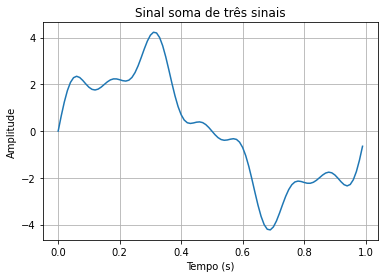

In [7]:
sinal = lambda A, w, t: A*np.sin(2*np.pi*w*t)

t = np.linspace(0,1,100, endpoint=False)

x = sinal(3,1,t)+sinal(1,4,t)+sinal(0.5,7,t)
plt.plot(t, x)

plt.xlabel( 'Tempo (s)' ) 
plt .ylabel( 'Amplitude' ) 
plt.title( 'Sinal soma de três sinais' ) 
plt.grid()
plt.show()

In [8]:
def transf_disc_fourier(f):
    N = len(f)
    F = np.zeros(N, dtype=np.complex128)
    for k in range(N):
        for n in range(N):
            F[k] += f[n]*np.exp(-2j*np.pi*k*n/N)
    return F

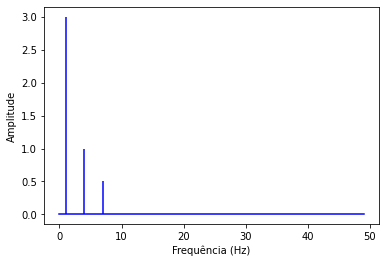

In [9]:
N = len(x)
An = transf_disc_fourier(x)

freq = np.arange(len(An))

plt.stem(freq[0:50], abs(An)[0:50]/(N/2), 'b',
         markerfmt=" ", basefmt="-b")

plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.show()

## Transformada Rápida de Fourier

Embora o algoritmo descrito no exemplo anterior calcule adequadamente a TDF, ele é computacionalmente pesado, pois são necessárias $N^2$ operações. Consequentemente, para amostra de dados mesmo de tamanho moderado, a determinação direta da TFD pode gastar muito tempo.
A transformada rápida de Fourier, ou FFT, é um algoritmo que foi desenvolvido para calcular a TFD de uma forma extremamente econômica. Sua velocidade vem do fato de que ela utiliza os resultados dos cálculos anteriores para reduzir o número de operações. Em particular, ela explora a periodicidade e a simetria das funções trigonométricas para calcular a transformada com aproximadamente $N log2 N$ operações. Logo, para N = 50 amostras, a FFT é da ordem de 10 vezes mais rápida do que a TFD padrão. Para N = 1000, é cerca de 100 vezes mais rápida.

O módulo `numpy.fft` inclui um conjunto básico de rotinas para transformada de Fourier discreta, o módulo   `scipy.fft`contém um conjunto mais abrangente.

A função `fft`calcula a Transformada de Fourier discreta para $n$ pontos amostrais. A função `rfft` retorna a primeira metade dos dados transformados, omitindo a parte simétrica. As funções `fftfreq` e `rfftfreq` retornam as frequências das amostras e a metade das frequências, respectivamente. 

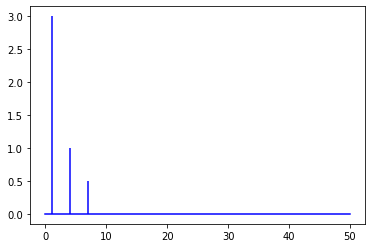

In [10]:
from numpy.fft import fft,rfft,fftfreq,rfftfreq,fftshift
from numpy.fft import hfft
N = len(x)

An = rfft(x)
freq = rfftfreq(N,1/N)

plt.stem(freq , abs(An)/(N/2),'b',
         markerfmt=" ", basefmt="-b")
plt.show()

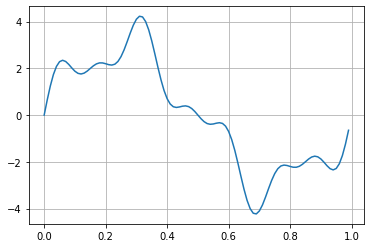

In [11]:
# aplicando a inversa
from scipy.fft import irfft

f = irfft(An)

plt.plot(t,f)
plt.grid()
plt.show()

### Removendo frequências indesejadas

Criando um sinal simples com uma única função senoidal.

In [12]:
t = np.arange(0, 1, 0.001) #Começo, fim, passo
s = np.sin(2*np.pi*10*t) # A=1, w0=10

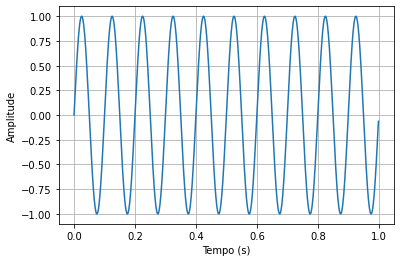

In [13]:
# plotando
fig, ax = plt.subplots()
ax.plot(t, s)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Amplitude')
ax.grid()

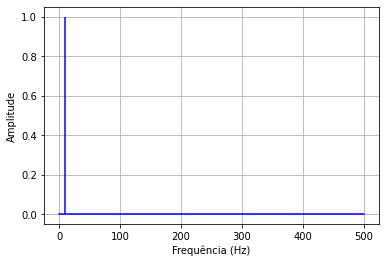

In [14]:
from scipy.fft import fft, fftfreq

N = len(s)
dt = 1/len(s)

# Aplica a transformada rápida
F = rfft(s)

# Pega o módulo e normaliza
amps = np.abs(F/(N/2))
freqs = rfftfreq(N, dt)

# Plota
fig, ax = plt.subplots()
ax.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.grid()

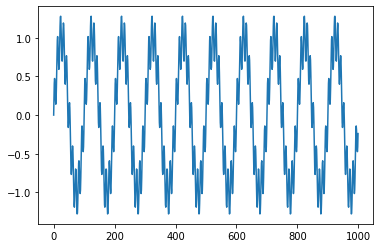

In [15]:
# Criando um ruido no sinal
r = 0.3*np.sin(2*np.pi*100*t)

# Sinal com ruído
sr = s+r

plt.plot(sr)
plt.show()

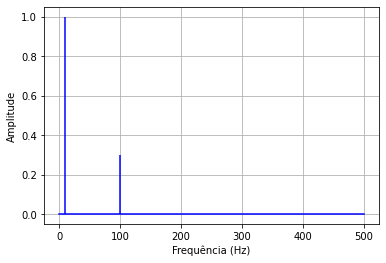

In [16]:
# Aplica a transformada rápida
Fr = rfft(sr)

# Pega o módulo e normaliza
amps = np.abs(Fr/(N/2))
freqs = rfftfreq(N, dt)

# Plota
fig, ax = plt.subplots()
ax.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.grid()

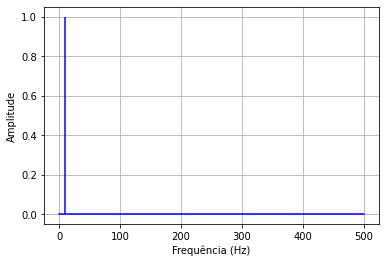

In [17]:
#zerando a amplitude na frequência 100
Fr[99 : 101] = 0
amps = np.abs(Fr/(N/2))
# Plota
fig, ax = plt.subplots()
ax.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.grid()

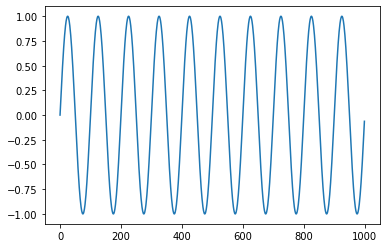

In [18]:
# aplicando a inversa
from scipy.fft import irfft

# Obtendo o sinal filtrado com a inversa
sf = irfft(Fr)

plt.plot(sf)
plt.show()

## Eliminando frequências indesejadas


In [19]:
plt.rcParams['figure.figsize'] = [12,4]

In [20]:
# Discretizando o tempo
dt = 0.001
t = np.arange(0, 1, dt)

# Criando um sinal
s = np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)

# Inserindo um ruido
sr = s + 2.5 * np.random.randn(len(t)) 
#min_signal, max_signal = signal.min(), signal.max()

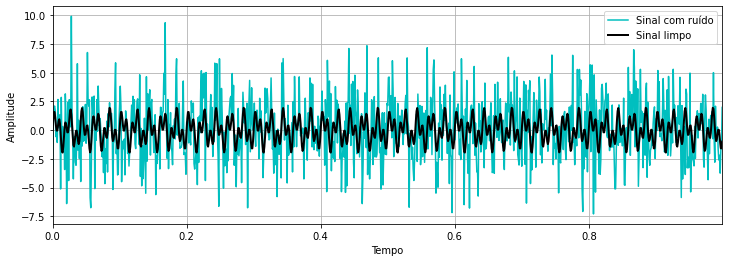

In [21]:
# Plotando
plt.plot(t, sr, color='c', linewidth=1.5, label='Sinal com ruído')
plt.plot(t, s, color='k', linewidth=2, label='Sinal limpo')
plt.xlim(t[0], t[-1])
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

Aplicando a transformada de Fourier e obtendo o espectro de frequências

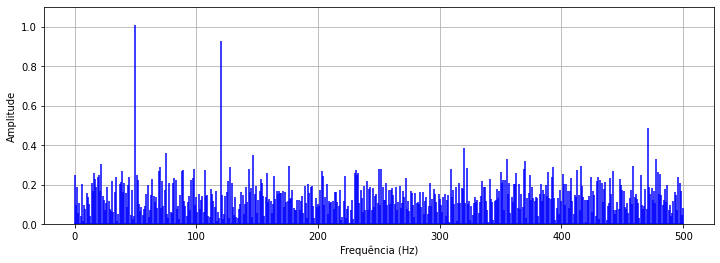

In [22]:
# Aplica a transformada rápida
Fr = rfft(sr)

# Pega o módulo e normaliza
amps = np.abs(Fr/(N/2))
freqs = rfftfreq(N, dt)

# Plota
fig, ax = plt.subplots()
ax.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.set_ylim(0,1.1)
ax.grid()

In [23]:
# Pegando as freq com amps>0.5 (limiar)
amps_idxs = amps < 0.5 
Fr[amps_idxs] = 0
amps = np.abs(Fr/(N/2))

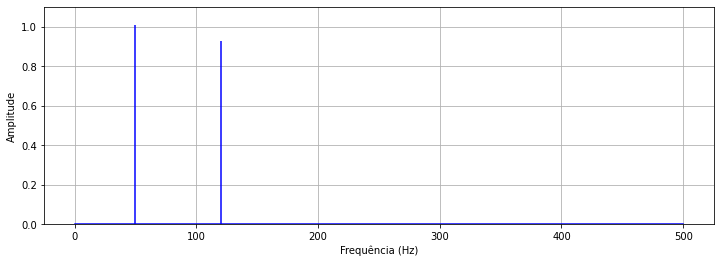

In [24]:
# Plota
fig, ax = plt.subplots()
ax.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.set_ylim(0,1.1)
ax.grid()

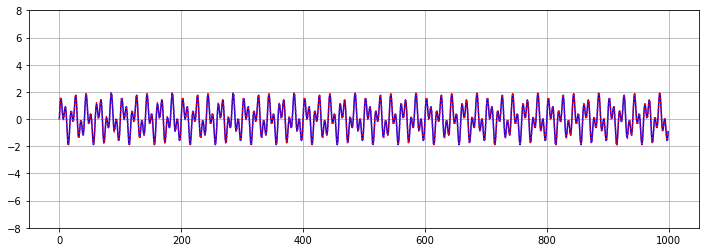

In [25]:
# Obtendo o sinal filtrado com a inversa
sf = irfft(Fr)

plt.plot(sf, 'b')
plt.plot(s, 'r:')
plt.ylim(-8,8)
plt.grid()
plt.show()

## Lendo dados em arquivo externo

In [26]:
data = np.genfromtxt('amps.dat')
dt = 0.001
t = np.arange(0, 1, dt)

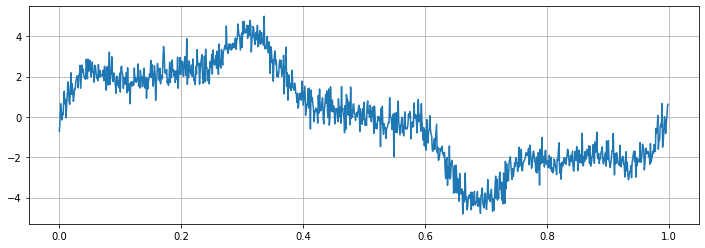

In [27]:
plt.plot(t, data)
plt.grid()
plt.show()

**Atividade:**

Aplicar a transformada discreta de Fourier para o sinal mostrado acima, identificar as frequências ruidosas e filtrar os dados. 

## Referências

CHAPRA, Steven, C. e Raymond P. CANALE. Métodos numéricos para engenharia . Disponível em: Minha Biblioteca, (7ª edição). Grupo A, 2016. 

KONG, Qingkai; SIAUW, Timmy; BAYEN, Alexandre M. Python Programming and Numerical Methods: A Guide For Engineers And Scientists. ed 1, Academic Press, 2021. DOI: https://doi.org/10.1016/C2018-0-04165-1

https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a

https://docs.scipy.org/doc/scipy/tutorial/fft.html#id10

https://www.kaggle.com/code/faressayah/signal-processing-with-python